In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import random
import matplotlib.colors
import copy
%matplotlib inline

In [43]:
def dfs (graph, row, col, row1, col1):
    stack = []
    discovered = [[False for i in range (128)] for i in range (128)]
    stack.append([row, col])
    result = []
    result.append([row, col])
    parent = [[None for i in range (128)] for i in range (128)]
    dist = 0
    dRow = [ -1, 0, 1, 0]
    dCol = [ 0, 1, 0, -1]
    def isValid(vis, row, col):
        # If cell lies out of bounds
        if (row < 0 or col < 0 or row >= 127 or col >= 127):
            return False

        # If cell is already visited
        if (vis[row][col]):
            return False
    # Otherwise
        return True
    while len(stack)!=0:
        current = stack.pop()
        x, y = current[0], current[1]
        if not discovered[x][y]:
            discovered[x][y] = True
            
            if x== row1 and y == col1:
                result.pop()
                short_path = []
                current = [row1, col1]
                while current != [row, col]:
            #         print("hi")
                    currentx , currenty = current[0], current[1]
                    next = parent[currentx][currenty]
                    short_path.append(next)
                    current = next 
                return dist, result, len(short_path)
            
            for i in range(4):
                adjx = x + dRow[i]
                adjy = y + dCol[i]
                if (isValid(discovered, adjx, adjy)) and (graph[adjx][adjy]==0):
                    stack.append([adjx, adjy])
#                     print(adjx, adjy)
                    parent[adjx][adjy]= [x,y]
                    result.append([adjx, adjy])
                    dist+=1
#     fig = plt.figure( figsize=(10,10) )
#     im = plt.imshow(graph)
#     plt.show()
    return dfs.result

In [30]:
def save_animation_video(grid, x,y,endx,endy):
    cp =copy.deepcopy(grid)
    dist, result, path = dfs(grid, x, y, endx, endy)
#     cp[x][y], cp[endx][endy]= 3, 6
    m,n = path[-2]
    cp[m][n]=3
    result = np.array(result)
#     print(dist)
    
    fig = plt.figure( figsize=(10,10) )
    cmap = matplotlib.colors.ListedColormap(["white", "black", "lightblue", "lightgreen", "red"])
    fps = 50

    grid1=[]
    for i in range (len(result)):
        x, y = result[i]
        cp[x][y] = 2
#         print(i[0])
        m = copy.deepcopy(cp)
        grid1.append(m)
    for i in range (len(path)):
        x, y = path[i]
        cp[x][y] = 3
        m = copy.deepcopy(cp)
        grid1.append(m)
        
    im = plt.imshow(grid1[0], cmap=cmap)
    print("start")

    def animate_func (i):
        if i % fps ==0:
            print('.', end=' ')
        im.set_array(grid1[i])
        return [im]

    anim = animation.FuncAnimation(fig, animate_func, frames= len(result)+len(path), interval=20)
    anim.save('dfs1.mp4')
    print("End")

In [45]:
# This wil import the graphs 
import numpy as np
grid20 = np.loadtxt("grid20.txt", dtype= int)
grid20 = grid20.tolist()
grid30 = np.loadtxt("grid30.txt", dtype= int)
grid30 = grid30.tolist()
grid35 = np.loadtxt("grid.txt", dtype= int)
grid35 = grid35.tolist()

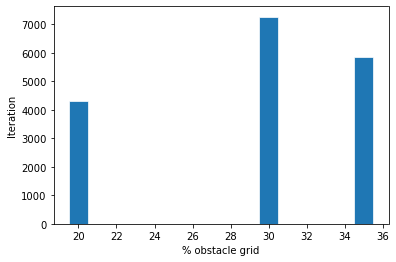

In [51]:
# Run this to plot graphs
dist3,_,_ = dfs(grid35,2,9,125,125)
dist1, _, _ = dfs(grid20, 2,2,125,125)
dist2, _,_ = dfs(grid30, 2,2,125,125)

y = [dist1,dist2,dist3]
x= [20,30,35]
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel("% obstacle grid")
plt.ylabel("Iteration")
plt.savefig("dfshistogram.png")
plt.show()

start
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . End


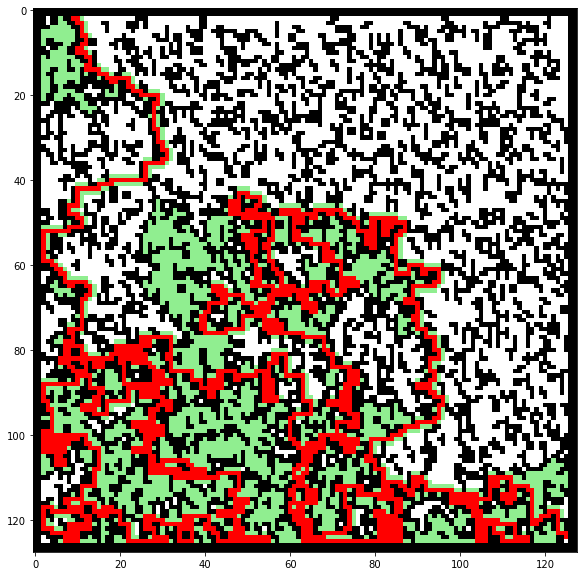

In [17]:
# Run this to save animation
save_animation_video(grid1, 2,9,125,125)